# Erzeugung von Zufallszahlen
## 1. Klausurwürfel von Professorin Müller und Professor Schmidt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
def throw_dice(dice, n=1):
    dice_values = list(dice.keys())
    probabilities = list(dice.values())

    dice_throws = []

    for i in np.random.uniform(0, 1, n):
        dice_throws.append(dice_values[np.argmax(np.cumsum(probabilities) >= i)])

    return dice_throws

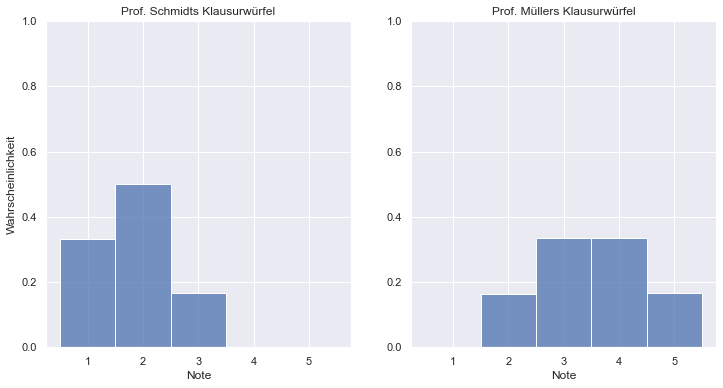

In [3]:
schmidt_dice = {
    1: 2/6,
    2: 3/6,
    3: 1/6,
    4: 0,
    5: 0
}

mueller_dice = {
    1: 0,
    2: 1/6,
    3: 2/6,
    4: 2/6,
    5: 1/6
}

number_of_throws = 100000

f = plt.figure(figsize=(12, 6))
gs = f.add_gridspec(1, 2)

# Schmidt simulation
schmidt_simulation = np.sort(throw_dice(dice=schmidt_dice, n=number_of_throws))

ax = f.add_subplot(gs[0, 0])
hist = sns.histplot(x=schmidt_simulation, stat='probability', ax=ax, discrete=True)
hist.set(ylabel="Wahrscheinlichkeit", xlabel="Note", title="Prof. Schmidts Klausurwürfel",
         xlim=(0.25, max(schmidt_dice.keys())+0.75), ylim=(0,1))

# Mueller simulation
mueller_simulation = np.sort(throw_dice(dice=mueller_dice, n=number_of_throws))

ax = f.add_subplot(gs[0, 1])
hist = sns.histplot(x=mueller_simulation, stat='probability', ax=ax, discrete=True)
hist.set(ylabel="", xlabel="Note", title="Prof. Müllers Klausurwürfel",
         xlim=(0.25, max(mueller_dice.keys())+0.75), ylim=(0,1))

plt.show()

## 2. Eigener Klausurwürfel

In [4]:
def throw_own_dice(n=1):
    marks = [
        1.0, 1.3, 1.5, 1.7,
        2.0, 2.3, 2.5, 2.7,
        3.0, 3.3, 3.5, 3.7,
        4.0, 4.3, 4.5, 4.7,
        5.0,
    ]

    marks = [str(mark) for mark in marks]

    dice_throws = []
    for i in range(n):
        while True:
            try:
                random_index = np.random.poisson(4)
                dice_throws.append(marks[random_index])
                break
            except IndexError:
                pass

    return dice_throws

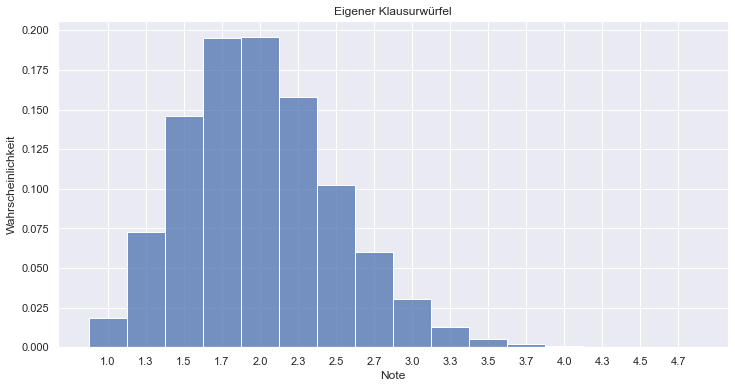

In [5]:
f = plt.figure(figsize=(12, 6))

own_simulation = np.sort(throw_own_dice(number_of_throws))

hist = sns.histplot(x=own_simulation, stat='probability')
hist.set(ylabel="Wahrscheinlichkeit", xlabel="Note", title="Eigener Klausurwürfel")

plt.show()
